# Examples

This notebook contains several examples that use the *deltares-coastal-structures-toolbox*. These examples revolve around the same basic coastal structure, defined below. To do so, first we need to import some Python packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import deltares_coastal_structures_toolbox.functions.hydraulic.wave_overtopping.eurotop2018 as wave_overtopping_eurotop2018
import deltares_coastal_structures_toolbox.functions.hydraulic.wave_overtopping.taw2002 as wave_overtopping_taw2002

### Example structure - Rubble-Mound Breakwater

In [2]:
cot_alpha_down = 2.0
cot_alpha_up = 2.5
B_berm = 3.0
db = 0.5
Rc_var = np.linspace(2.0, 6.0, 1000)
q_max = 10e-3

### Example wave load

In [3]:
Hm0 = 2.0
Tmm10 = 5.0
Tp = 1.1 * Tmm10
beta = 30.0

## Wave overtopping

Below two different wave overtopping formulas, TAW (2002) and EurOtop (2018), are applied to our structure. 

In [4]:
Rc_taw2002, _ = wave_overtopping_taw2002.calculate_crest_freeboard_Rc(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    q=q_max,
    cot_alpha_down=cot_alpha_down,
    cot_alpha_up=cot_alpha_up,
    B_berm=B_berm,
    db=db,
)
Rc_eurotop2018, _ = wave_overtopping_eurotop2018.calculate_crest_freeboard_Rc(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    q=q_max,
    cot_alpha_down=cot_alpha_down,
    cot_alpha_up=cot_alpha_up,
    B_berm=B_berm,
    db=db,
)

print(
    f"Required freeboard for our structure following TAW (2002): {Rc_taw2002:.2f} m and EurOtop (2018): {Rc_eurotop2018:.2f} m"
)

Required freeboard for our structure following TAW (2002): 2.93 m and EurOtop (2018): 2.97 m


Clearly there are small differences between the two formulas. To gain more insight into those differences, let's calculate the mean wave overtopping discharge for a range of different crest freeboard heights (Rc) and plot them.

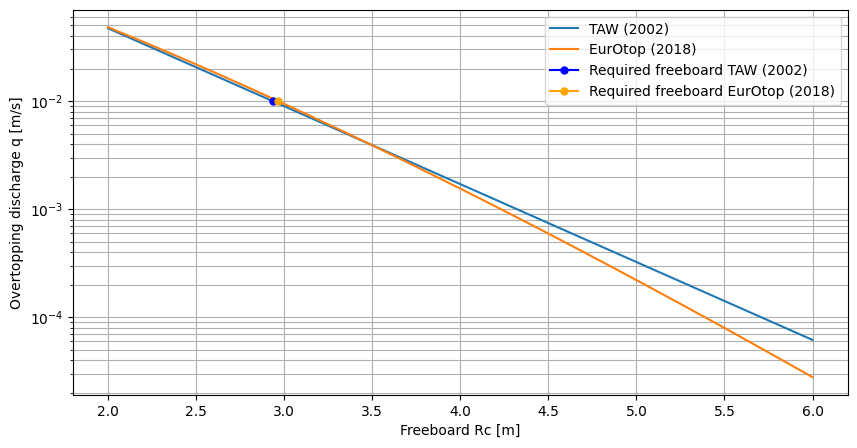

In [5]:
q_taw2002, _ = wave_overtopping_taw2002.calculate_overtopping_discharge_q(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    Rc=Rc_var,
    cot_alpha_down=cot_alpha_down,
    cot_alpha_up=cot_alpha_up,
    B_berm=B_berm,
    db=db,
)
q_eurotop2018, _ = wave_overtopping_eurotop2018.calculate_overtopping_discharge_q(
    Hm0=Hm0,
    Tmm10=Tmm10,
    beta=beta,
    Rc=Rc_var,
    cot_alpha_down=cot_alpha_down,
    cot_alpha_up=cot_alpha_up,
    B_berm=B_berm,
    db=db,
)

plt.figure(figsize=(10, 5))
plt.plot(Rc_var, q_taw2002, label="TAW (2002)")
plt.plot(Rc_var, q_eurotop2018, label="EurOtop (2018)")
plt.plot(Rc_taw2002, q_max, label="Required freeboard TAW (2002)", marker="o", markersize=5, color="blue")
plt.plot(Rc_eurotop2018, q_max, label="Required freeboard EurOtop (2018)", marker="o", markersize=5, color="orange")
plt.yscale("log")
plt.xlabel("Freeboard Rc [m]")
plt.ylabel("Overtopping discharge q [m/s]")
plt.grid(which="both")
plt.legend()